In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.preprocessing import LabelEncoder
from math import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
mirrored_strategy = tf.distribute.MirroredStrategy()

Num GPUs Available:  1
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [6]:
df = pd.read_csv('home-credit-default-risk//application_train.csv')

# visualisation data

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

## valeur vide ou null 

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values()

In [ ]:
#on suppr toutes les colonnes à plus de 90% de val manquante
df = df[df.columns[(df.isna().sum()/df.shape[0]) < 0.9]]

# Variables du csv

In [ ]:
df.dtypes.value_counts()

In [ ]:
pbar = tqdm(total=1)
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])
    pbar.update(1/len(df.select_dtypes('float')))
pbar.close()

In [ ]:
pbar = tqdm(total=1)
for col in df.select_dtypes('object'):
    print(f'{col :-<40} => {df[col].unique()}')
    plt.figure()
    df[col].value_counts(normalize=True, dropna=False).plot.pie()
    pbar.update(1/len(df.select_dtypes('object')))
pbar.close()

# encoder des 16 colonnes objects

In [ ]:
#df2 = pd.get_dummies(df)

In [7]:
le = []
for i,col in enumerate(df.select_dtypes('object').columns):
    try:
        le.append(LabelEncoder())
        df[col] = le[i].fit_transform(df[col].astype(str))
    except:
        print('error : '+col)

In [ ]:
#le1 = LabelEncoder()
#le2 = LabelEncoder()

In [ ]:
#df['EMERGENCYSTATE_MODE_1'] = df['EMERGENCYSTATE_MODE'].astype(str)

In [ ]:
#le1.fit_transform(df['EMERGENCYSTATE_MODE_1'])

In [ ]:
#le2.fit_transform(df['ORGANIZATION_TYPE'])

In [ ]:
#le1.classes_

In [ ]:
#le2.classes_

In [ ]:
#df['EMERGENCYSTATE_MODE_1'] = le1.fit_transform(df['EMERGENCYSTATE_MODE_1'])
#df['ORGANIZATION_TYPE_1'] = le2.fit_transform(df['ORGANIZATION_TYPE'])

# difference entre positif et negatif

In [ ]:
#df['TARGET']

In [ ]:
df.dtypes.value_counts()

In [ ]:
positif = df[df['TARGET'] == 1 ]
negatif = df[df['TARGET'] != 1 ]

In [ ]:
df_int32_columns = df.select_dtypes('int32').columns
df_int64_columns = df.select_dtypes('int64').columns
df_float_columns = df.select_dtypes('float').columns

In [ ]:
pbar = tqdm(total=1)
x=0
y=0
nbr = 3
fig, axs = plt.subplots(ceil(len(df_int32_columns)/nbr), nbr,  figsize=(20, 20))
for col in (df_int32_columns):
    if(x>=nbr):
        x=0
        y+=1
    sns.distplot(positif[col], label='positif', ax=axs[y,x])
    sns.distplot(negatif[col], label='negatif', ax=axs[y,x])
    axs[y,x].legend()
    x+=1
    pbar.update(1/len(df_int32_columns))
pbar.close()

In [ ]:
pbar = tqdm(total=1)
x=0
y=0
nbr = 3
fig, axs = plt.subplots(ceil(len(df_int64_columns)/nbr), nbr,  figsize=(20, 80))
for col in (df_int64_columns):
    if(x>=nbr):
        x=0
        y+=1
    sns.distplot(positif[col], label='positif', ax=axs[y,x])
    sns.distplot(negatif[col], label='negatif', ax=axs[y,x])
    axs[y,x].legend()
    x+=1
    pbar.update(1/len(df_int64_columns))
pbar.close()

In [ ]:
pbar = tqdm(total=1)
x=0
y=0
nbr = 3
fig, axs = plt.subplots(ceil(len(df_float_columns)/nbr), nbr,  figsize=(20, 120))
for col in (df_float_columns):
    if(x>=nbr):
        x=0
        y+=1
    sns.distplot(positif[col], label='positif', ax=axs[y,x])
    sns.distplot(negatif[col], label='negatif', ax=axs[y,x])
    axs[y,x].legend()
    x+=1
    pbar.update(1/len(df_float_columns))
pbar.close()

# nouveau dataTrain

In [10]:
data_train = df[['TARGET','EMERGENCYSTATE_MODE','HOUSETYPE_MODE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','FONDKAPREMONT_MODE','DAYS_BIRTH','DAYS_ID_PUBLISH','FLAG_PHONE','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_3','AMT_CREDIT','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]
data_train.head()

,TARGET,EMERGENCYSTATE_MODE,HOUSETYPE_MODE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,FONDKAPREMONT_MODE,DAYS_BIRTH,DAYS_ID_PUBLISH,FLAG_PHONE,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,1,0,0,8,6,5,1,0,1,7,4,3,-9461,-2120,1,0,1,406597.5,351000.0,0.018801,-3648.0,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0
1,0,0,0,3,1,39,0,0,0,4,1,3,-16765,-291,1,0,1,1293502.5,1129500.0,0.003541,-1186.0,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0
2,0,2,1,8,1,11,1,1,1,7,4,0,-19046,-2531,1,0,0,135000.0,135000.0,0.010032,-4260.0,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0
3,0,2,1,8,6,5,0,0,1,7,4,0,-19005,-2437,0,0,1,312682.5,297000.0,0.008019,-9833.0,NaN,0.650442,NaN,2.0,0.0,2.0,0.0
4,0,2,1,3,4,37,1,0,1,7,4,0,-19932,-3458,0,1,0,513000.0,513000.0,0.028663,-4311.0,NaN,0.322738,NaN,0.0,0.0,0.0,0.0


In [244]:
(data_train.isna().mean()).sort_values()

TARGET                        0.000000
DAYS_REGISTRATION             0.000000
REGION_POPULATION_RELATIVE    0.000000
AMT_CREDIT                    0.000000
FLAG_DOCUMENT_3               0.000000
REG_CITY_NOT_WORK_CITY        0.000000
FLAG_PHONE                    0.000000
DAYS_BIRTH                    0.000000
FONDKAPREMONT_MODE            0.000000
NAME_EDUCATION_TYPE           0.000000
DAYS_ID_PUBLISH               0.000000
FLAG_OWN_REALTY               0.000000
EMERGENCYSTATE_MODE           0.000000
NAME_INCOME_TYPE              0.000000
OCCUPATION_TYPE               0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
HOUSETYPE_MODE                0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
ORGANIZATION_TYPE             0.000000
AMT_GOODS_PRICE               0.000904
EXT_SOURCE_2                  0.002146
OBS_30_CNT_SOCIAL_CIRCLE      0.003320
OBS_60_CNT_SOCIAL_CIRCLE      0.003320
DEF_30_CNT_SOCIAL_CIRCLE      0.003320
DEF_60_CNT_SOCIAL_CIRCLE 

In [245]:
data_train['EMERGENCYSTATE_MODE'].isna().sum()

0

In [ ]:
pbar = tqdm(total=1)
for col in data_train.columns:
    if((data_train[col].isna().sum()) > 0):
        print(f'{col :-<40} => {data_train[col].unique()}')
        plt.figure()
        data_train[col].value_counts(normalize=True, dropna=False).plot.pie()
    pbar.update(1/len(data_train.columns))
pbar.close()

# suppr les 1021 lignes vide 

In [ ]:
a=data_train['OBS_30_CNT_SOCIAL_CIRCLE'].isna()
a2=data_train['OBS_60_CNT_SOCIAL_CIRCLE'].isna()
a3=data_train['DEF_60_CNT_SOCIAL_CIRCLE'].isna()

In [ ]:
b= (a==1)&(a2==1)&(a3==1)

In [ ]:
print(b==a)

In [ ]:
data_train['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum()

In [11]:
data_train = data_train.dropna(subset=['OBS_30_CNT_SOCIAL_CIRCLE'])

In [12]:
(data_train.isna().sum()/data_train.shape[0]).sort_values()

TARGET                        0.000000
DEF_30_CNT_SOCIAL_CIRCLE      0.000000
OBS_60_CNT_SOCIAL_CIRCLE      0.000000
DAYS_REGISTRATION             0.000000
REGION_POPULATION_RELATIVE    0.000000
AMT_CREDIT                    0.000000
FLAG_DOCUMENT_3               0.000000
REG_CITY_NOT_WORK_CITY        0.000000
FLAG_PHONE                    0.000000
OBS_30_CNT_SOCIAL_CIRCLE      0.000000
DAYS_BIRTH                    0.000000
DAYS_ID_PUBLISH               0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_INCOME_TYPE              0.000000
FLAG_OWN_REALTY               0.000000
FLAG_OWN_CAR                  0.000000
CODE_GENDER                   0.000000
ORGANIZATION_TYPE             0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
OCCUPATION_TYPE               0.000000
HOUSETYPE_MODE                0.000000
EMERGENCYSTATE_MODE           0.000000
FONDKAPREMONT_MODE            0.000000
DEF_60_CNT_SOCIAL_CIRCLE      0.000000
AMT_GOODS_PRICE               0.000907
EXT_SOURCE_2             

# normalisation de la data

# train et test

In [109]:
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['TARGET']), data_train['TARGET'], test_size=0.20, random_state=42)

# Reseaux neuronnes 

# Model

In [110]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_dim=(X_train.shape[1])),
    #tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dense(30, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [111]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 10)                280       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 11        
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [113]:
X_train.shape

(245192, 27)

# Entrainement

In [114]:
history = model.fit(X_train,
                    epochs=100,
                    batch_size= 40)

Epoch 1/100


ValueError: in user code:

    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:540 train_step  **
        _minimize(self.distribute_strategy, tape, self.optimizer, loss,
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1803 _minimize
        gradients = optimizer._aggregate_gradients(zip(gradients,  # pylint: disable=protected-access
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:521 _aggregate_gradients
        filtered_grads_and_vars = _filter_grads(grads_and_vars)
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:1218 _filter_grads
        raise ValueError("No gradients provided for any variable: %s." %

    ValueError: No gradients provided for any variable: ['dense_38/kernel:0', 'dense_38/bias:0', 'dense_39/kernel:0', 'dense_39/bias:0'].


In [20]:
history = model.fit(X_train,
                    epochs=100,
                    batch_size= 40,
                   validation_data=y_train, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
                               tfdocs.modeling.EpochDots(),
                               tf.keras.callbacks.ModelCheckpoint("weights.best.hdf5", 
                                                                   monitor='val_accuracy', 
                                                                   verbose=0, 
                                                                   save_best_only=True, 
                                                                   save_weights_only=False, 
                                                                   mode='max', 
                                                                   periode=1)])

Epoch 1/100


AttributeError: in user code:

    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:543 train_step  **
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:391 update_state
        self._build(y_pred, y_true)
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:321 _build
        self._metrics = nest.map_structure_up_to(y_pred, self._get_metric_objects,
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\util\nest.py:1114 map_structure_up_to
        return map_structure_with_tuple_paths_up_to(
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\util\nest.py:1213 map_structure_with_tuple_paths_up_to
        results = [func(*args, **kwargs) for args in zip(flat_path_list,
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\util\nest.py:1213 <listcomp>
        results = [func(*args, **kwargs) for args in zip(flat_path_list,
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\util\nest.py:1116 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:421 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:421 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:442 _get_metric_object
        y_t_rank = len(y_t.shape.as_list())

    AttributeError: 'NoneType' object has no attribute 'shape'


# ensemble classifier

In [115]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import *

In [116]:
model1 = SGDClassifier(random_state=0)
model2 = DecisionTreeClassifier(random_state=0)
model3 = KNeighborsClassifier(n_neighbors=2)

#voting hard voting, soft voting
model4 = VotingClassifier([('sgd', model1), 
                          ('tree', model2),
                          ('kn', model3)],
                         voting='hard')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,5),
             'metric':['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
for model in (model1, model2, model3, model4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_train, y_train))

# votngClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [1]:
#6.4 Confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))
confusion_matrix(y_test, model.predict(X_test))

NameError: name 'y_test' is not defined

# valeurs vide 

In [83]:
imputer = KNNImputer(n_neighbors=2)

In [84]:
lol = imputer.fit_transform([data_train['EXT_SOURCE_2']])[0]

In [85]:
lol.shape

(305834,)

In [97]:
columns = (data_train.isna().mean()).sort_values() >0
columns_index = columns.index[columns.values == True]

# imputer = KNNImputer(n_neighbors= 2)


# # imputer = KNNImputer(n_neighbors=5)
# # df = data_train(imputer.fit_transform(data_train),columns = data_train.columns)
# # df.isna().any()

# # print(columns_index)

# pbar = tqdm(total=1)
# for column in columns_index:
    
#     impute_with_2 = imputer.fit_transform([data_train[column]])[0]
# #     print(impute_with_2[0:5])
# #     print(data_train[column].head())
    
#     print("Colonne : "+ column + " -- taille KNN : "+str(len(impute_with_2)) + " -- taille colonne: "+str(len(data_train[column])))
    
# #     nulls = data_train[data_train[column].isna()]

# #     for i, ni in enumerate(nulls.index[:len(impute_with_2)]):
# #         data_train[column].loc[ni] = impute_with_2[i]

#     pbar.update(1/(len(columns_index)))
# pbar.close()


# # data_train.head()

In [98]:
imp_median= SimpleImputer(missing_values=np.nan, strategy='median')

pbar = tqdm(total=1)
for column in columns_index:
    
    imp_median= imp_median.fit(data_train[[column]])
    data_train[column] = imp_median.transform(data_train[[column]]).ravel()

    pbar.update(1/(len(columns_index)))
pbar.close()

In [99]:
(data_train.isna().mean()).sort_values()

TARGET                        0.0
DEF_30_CNT_SOCIAL_CIRCLE      0.0
OBS_60_CNT_SOCIAL_CIRCLE      0.0
EXT_SOURCE_3                  0.0
EXT_SOURCE_2                  0.0
EXT_SOURCE_1                  0.0
DAYS_REGISTRATION             0.0
REGION_POPULATION_RELATIVE    0.0
AMT_GOODS_PRICE               0.0
AMT_CREDIT                    0.0
FLAG_DOCUMENT_3               0.0
REG_CITY_NOT_WORK_CITY        0.0
FLAG_PHONE                    0.0
DAYS_ID_PUBLISH               0.0
DAYS_BIRTH                    0.0
FONDKAPREMONT_MODE            0.0
NAME_EDUCATION_TYPE           0.0
NAME_INCOME_TYPE              0.0
FLAG_OWN_REALTY               0.0
FLAG_OWN_CAR                  0.0
CODE_GENDER                   0.0
ORGANIZATION_TYPE             0.0
WEEKDAY_APPR_PROCESS_START    0.0
OCCUPATION_TYPE               0.0
HOUSETYPE_MODE                0.0
EMERGENCYSTATE_MODE           0.0
OBS_30_CNT_SOCIAL_CIRCLE      0.0
DEF_60_CNT_SOCIAL_CIRCLE      0.0
dtype: float64

In [100]:
df.shape

(307511, 122)

In [101]:
df_test = pd.read_csv('home-credit-default-risk//application_test.csv')

In [102]:
for i,col in enumerate(df_test.select_dtypes('object').columns):
    try:
        df_test[col] = le[i].transform(df_test[col].astype(str))
    except:
        print('error : '+col)

# autre

In [103]:
test = df.groupby(['TARGET'])
test

In [104]:
test.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,3,0,0.0149,5,0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,3,0,0.0714,0,0,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,7,2,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [105]:
#test['CODE_GENDER'].value_counts()

In [106]:
test['FLAG_OWN_CAR'].value_counts()

TARGET  FLAG_OWN_CAR
0       0               185675
        1                97011
1       0                17249
        1                 7576
Name: FLAG_OWN_CAR, dtype: int64

TARGET
0    [[AxesSubplot(0.125,0.826071;0.0553571x0.05392...
1    [[AxesSubplot(0.125,0.826071;0.0553571x0.05392...
dtype: object

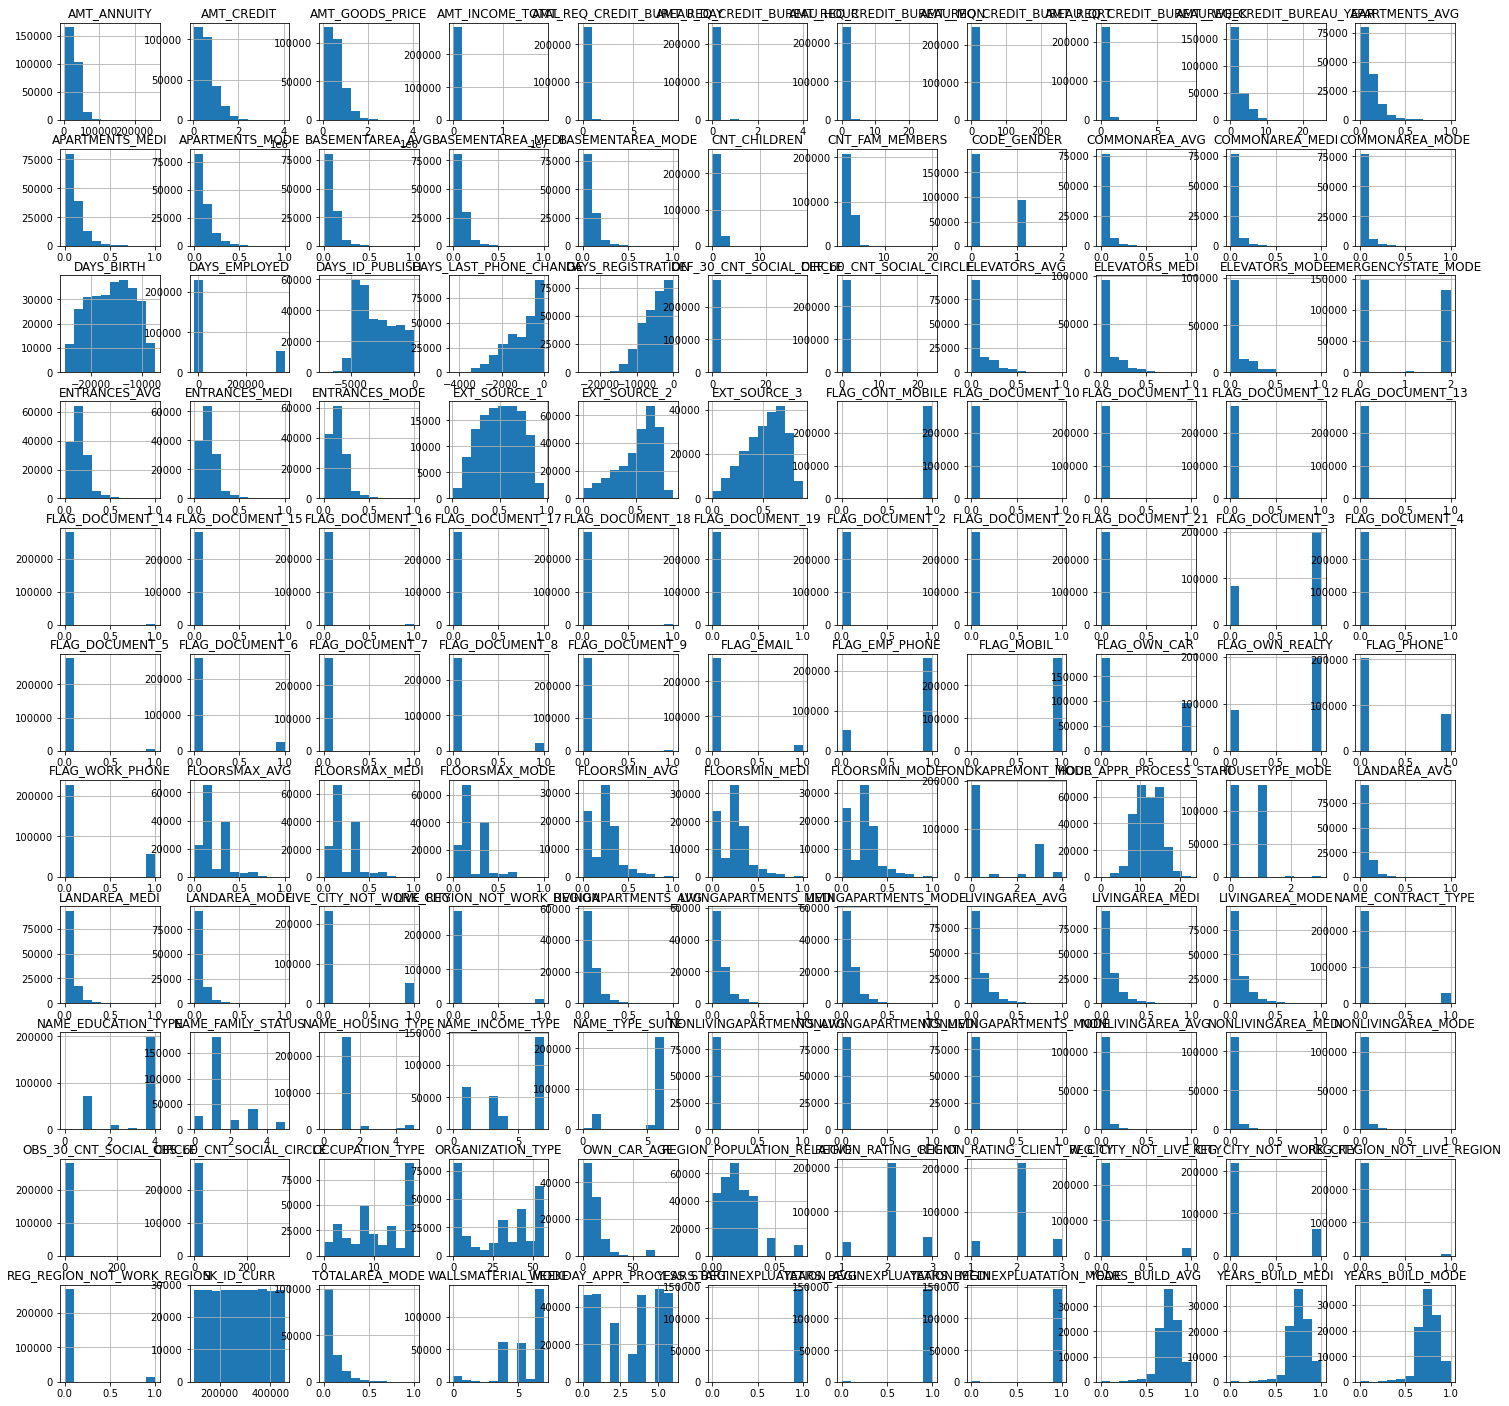

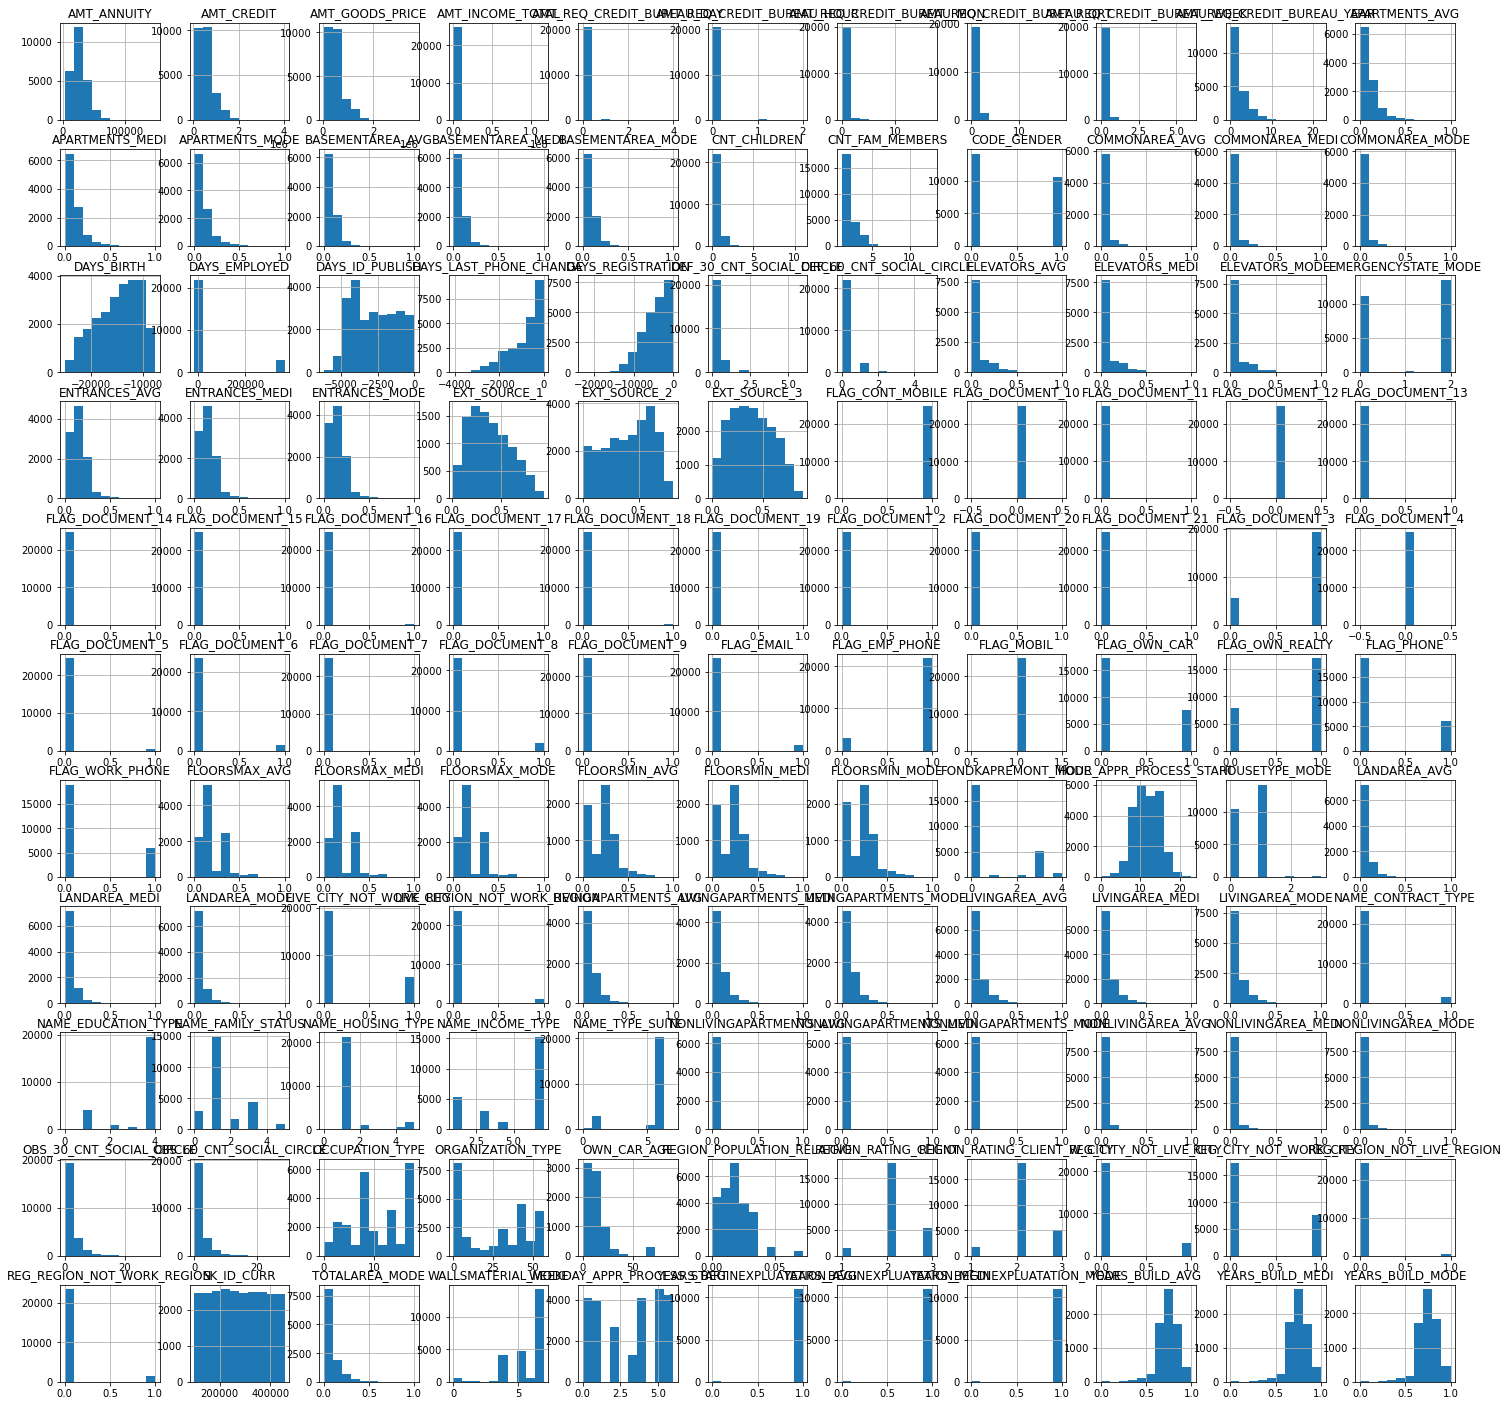

In [107]:

x=0
y=0

# test.hist()
# test.plot()
# test.size()

# test['TARGET'].columns

# print(test.group.columns)

columns_name = []

for name, group in test:
    columns_name = group.columns


# negatif_test = test[test['TARGET'] != 1]
# positif_test = test['TARGET'] == 1


# test['TARGET'].hist()

test.hist(figsize=(25, 25))

# fig, axs = plt.subplots(ceil(len(columns_name)/4), 4,  figsize=(30, 20))
# for col in (columns_name):
#     if(x>=4):
#         x=0
#         y+=1
        
#     sns.distplot(test[col], label='positif', ax=axs[y,x])
# #     sns.distplot(positif_test[col], label='positif', ax=axs[y,x])
# #     sns.distplot(negatif_test[col], label='negatif', ax=axs[y,x])
#     axs[y,x].legend()
#     x+=1

In [108]:
(data_train.isna().sum()/data_train.shape[0]).sort_values()

TARGET                        0.0
DEF_30_CNT_SOCIAL_CIRCLE      0.0
OBS_60_CNT_SOCIAL_CIRCLE      0.0
EXT_SOURCE_3                  0.0
EXT_SOURCE_2                  0.0
EXT_SOURCE_1                  0.0
DAYS_REGISTRATION             0.0
REGION_POPULATION_RELATIVE    0.0
AMT_GOODS_PRICE               0.0
AMT_CREDIT                    0.0
FLAG_DOCUMENT_3               0.0
REG_CITY_NOT_WORK_CITY        0.0
FLAG_PHONE                    0.0
DAYS_ID_PUBLISH               0.0
DAYS_BIRTH                    0.0
FONDKAPREMONT_MODE            0.0
NAME_EDUCATION_TYPE           0.0
NAME_INCOME_TYPE              0.0
FLAG_OWN_REALTY               0.0
FLAG_OWN_CAR                  0.0
CODE_GENDER                   0.0
ORGANIZATION_TYPE             0.0
WEEKDAY_APPR_PROCESS_START    0.0
OCCUPATION_TYPE               0.0
HOUSETYPE_MODE                0.0
EMERGENCYSTATE_MODE           0.0
OBS_30_CNT_SOCIAL_CIRCLE      0.0
DEF_60_CNT_SOCIAL_CIRCLE      0.0
dtype: float64